# Prototype_Dev_Testing
*Chuck Bolin, Updated November 2024*  


### Show pygame Keys

In [1]:
## Show pygame keys
import pygame
# keys = [attr for attr in dir(pygame) if attr.startswith('K_') and not attr[2:].isalnum()]
keys = [attr for attr in sorted(dir(pygame)) if attr.startswith('K_') ]
print(keys)

pygame 2.6.1 (SDL 2.28.4, Python 3.13.0)
Hello from the pygame community. https://www.pygame.org/contribute.html
['K_0', 'K_1', 'K_2', 'K_3', 'K_4', 'K_5', 'K_6', 'K_7', 'K_8', 'K_9', 'K_AC_BACK', 'K_AMPERSAND', 'K_ASTERISK', 'K_AT', 'K_BACKQUOTE', 'K_BACKSLASH', 'K_BACKSPACE', 'K_BREAK', 'K_CAPSLOCK', 'K_CARET', 'K_CLEAR', 'K_COLON', 'K_COMMA', 'K_CURRENCYSUBUNIT', 'K_CURRENCYUNIT', 'K_DELETE', 'K_DOLLAR', 'K_DOWN', 'K_END', 'K_EQUALS', 'K_ESCAPE', 'K_EURO', 'K_EXCLAIM', 'K_F1', 'K_F10', 'K_F11', 'K_F12', 'K_F13', 'K_F14', 'K_F15', 'K_F2', 'K_F3', 'K_F4', 'K_F5', 'K_F6', 'K_F7', 'K_F8', 'K_F9', 'K_GREATER', 'K_HASH', 'K_HELP', 'K_HOME', 'K_INSERT', 'K_KP0', 'K_KP1', 'K_KP2', 'K_KP3', 'K_KP4', 'K_KP5', 'K_KP6', 'K_KP7', 'K_KP8', 'K_KP9', 'K_KP_0', 'K_KP_1', 'K_KP_2', 'K_KP_3', 'K_KP_4', 'K_KP_5', 'K_KP_6', 'K_KP_7', 'K_KP_8', 'K_KP_9', 'K_KP_DIVIDE', 'K_KP_ENTER', 'K_KP_EQUALS', 'K_KP_MINUS', 'K_KP_MULTIPLY', 'K_KP_PERIOD', 'K_KP_PLUS', 'K_LALT', 'K_LCTRL', 'K_LEFT', 'K_LEFTBRACKET', '

### Pygame Load Tileset Render Image - Ignore Alpha

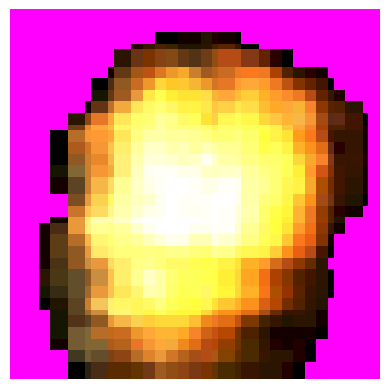

In [3]:
import pygame
import numpy as np
import matplotlib.pyplot as plt

# Initialize pygame
pygame.init()

# Create a minimal display surface (required for pygame.surfarray)
pygame.display.set_mode((1, 1))

# Load the sprite sheet with the correct path
sprite_sheet = pygame.image.load("./assets/sprites/effects.png").convert_alpha()

# Extract a sprite (e.g., x=0, y=0, width=64, height=64)
sprite = sprite_sheet.subsurface((0, 0, 64, 64))

# Convert the pygame.Surface to a NumPy array
sprite_array = pygame.surfarray.array3d(sprite)

# Transpose the array for proper rendering in matplotlib
sprite_array = np.transpose(sprite_array, (1, 0, 2))

# Render the sprite inline with matplotlib
plt.imshow(sprite_array)
plt.axis("off")
plt.show()


### Pygame Load Tileset Render Image - Show Alpha Transparency

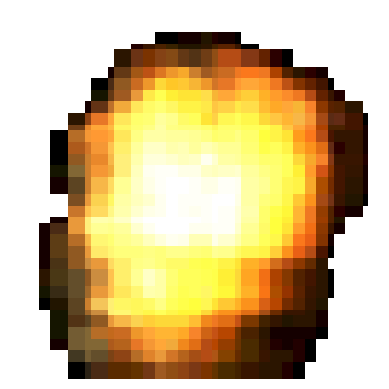

In [4]:
import pygame
import numpy as np
import matplotlib.pyplot as plt

# Initialize pygame
pygame.init()

# Create a minimal display surface (required for pygame.surfarray)
pygame.display.set_mode((1, 1))

# Load the sprite sheet with transparency
sprite_sheet = pygame.image.load("./assets/sprites/effects.png").convert_alpha()

# Extract a sprite (e.g., x=0, y=0, width=64, height=64)
sprite = sprite_sheet.subsurface((0, 0, 64, 64))

# Convert the pygame.Surface to RGB and Alpha arrays
sprite_rgb = pygame.surfarray.array3d(sprite)  # Extract RGB
sprite_alpha = pygame.surfarray.array_alpha(sprite)  # Extract Alpha

# Transpose the RGB array for proper rendering in matplotlib
sprite_rgb = np.transpose(sprite_rgb, (1, 0, 2))
sprite_alpha = np.transpose(sprite_alpha, (1, 0))  # Transpose Alpha to match

# Combine RGB and Alpha into a single RGBA array
sprite_rgba = np.dstack((sprite_rgb, sprite_alpha))

# Render the sprite inline with matplotlib
plt.imshow(sprite_rgba)
plt.axis("off")
plt.show()


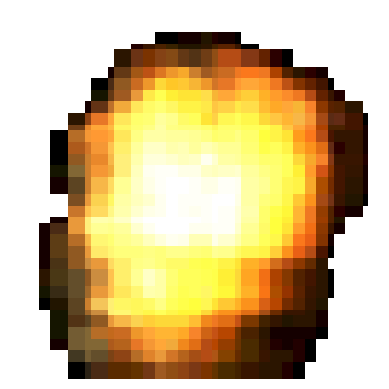

In [9]:
import pygame
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

# Initialize pygame
pygame.init()

# Create a minimal display surface (required for pygame.surfarray)
pygame.display.set_mode((1, 1))

# Load the sprite sheet with transparency
sprite_sheet = pygame.image.load("./assets/sprites/effects.png").convert_alpha()

# Sprite dimensions
sprite_width = 64
sprite_height = 64
sprites_per_row = 12
rows = 4

# Function to extract all 48 sprites
def extract_sprites(sprite_sheet, sprite_width, sprite_height, sprites_per_row, rows):
    sprites = []
    for row in range(rows):
        for col in range(sprites_per_row):
            x = col * sprite_width
            y = row * sprite_height
            sprite = sprite_sheet.subsurface((x, y, sprite_width, sprite_height))
            sprites.append(sprite)
    return sprites

# Extract all sprites
sprites = extract_sprites(sprite_sheet, sprite_width, sprite_height, sprites_per_row, rows)

# Set up matplotlib figure
fig, ax = plt.subplots()
ax.axis("off")  # Turn off the axis

# Add the initial image to the plot
sprite_rgb = pygame.surfarray.array3d(sprites[0])  # Extract RGB of the first sprite
sprite_alpha = pygame.surfarray.array_alpha(sprites[0])  # Extract Alpha
sprite_rgb = np.transpose(sprite_rgb, (1, 0, 2))  # Transpose for matplotlib
sprite_alpha = np.transpose(sprite_alpha, (1, 0))  # Transpose Alpha
sprite_rgba = np.dstack((sprite_rgb, sprite_alpha))  # Combine into RGBA
img = ax.imshow(sprite_rgba)  # Initial plot setup

# Animate the sprites
for sprite in sprites:
    # Convert the sprite to an RGBA array
    sprite_rgb = pygame.surfarray.array3d(sprite)  # Extract RGB
    sprite_alpha = pygame.surfarray.array_alpha(sprite)  # Extract Alpha
    sprite_rgb = np.transpose(sprite_rgb, (1, 0, 2))  # Transpose for matplotlib
    sprite_alpha = np.transpose(sprite_alpha, (1, 0))  # Transpose Alpha
    sprite_rgba = np.dstack((sprite_rgb, sprite_alpha))  # Combine into RGBA

    # Update the image data
    img.set_data(sprite_rgba)
    plt.pause(1)  # Short delay to simulate animation

plt.show()  # Finalize the plot
